In [1]:
import librosa

In [7]:
import matplotlib.pyplot as plt



In [8]:
a_path = "blues.00008.au"

In [10]:
x, sr = librosa.load(a_path)

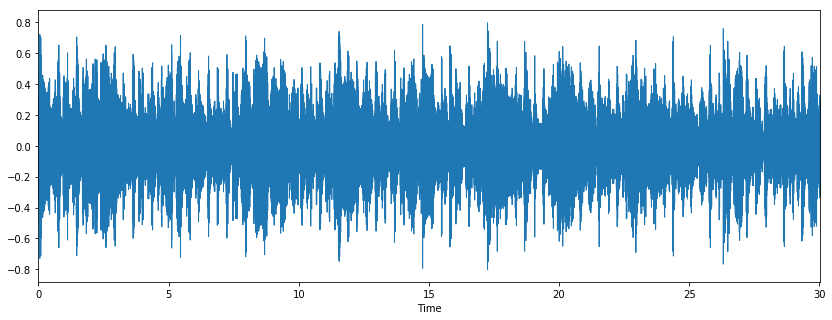

In [11]:
import librosa.display

# audio array
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)


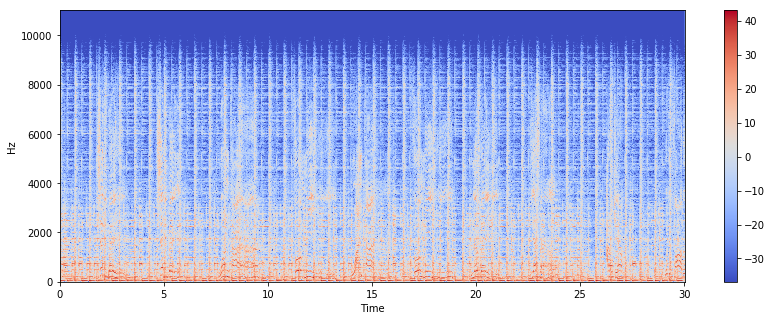

In [12]:
# spectogram

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

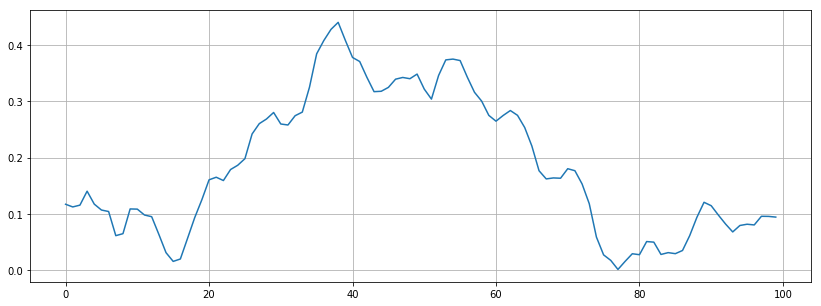

In [13]:
# zero crossing rate
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [14]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

0


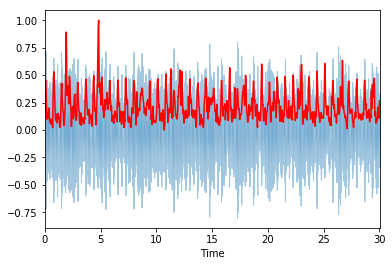

In [16]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

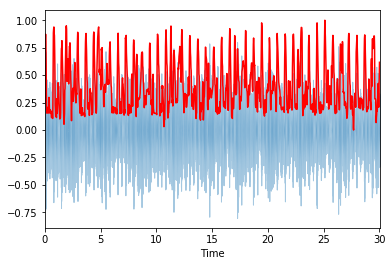

In [17]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 1293)


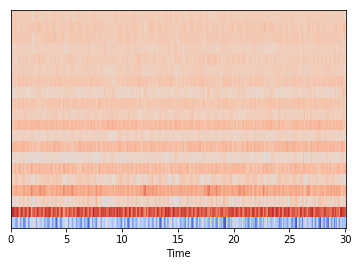

In [21]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
# (20, 97)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[ 2.14175159e-15 -6.44657053e-15  2.15518932e-15  6.32303353e-16
  1.32969171e-15  1.50854666e-15  6.94146983e-16 -1.18355098e-15
  2.52921341e-15 -6.14787073e-17  1.21575002e-15  8.22234778e-16
  2.94393709e-15 -7.04343347e-16 -1.14164929e-15 -2.31661386e-16
 -8.32280880e-16 -2.68523924e-16 -7.88232588e-17  6.35737918e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


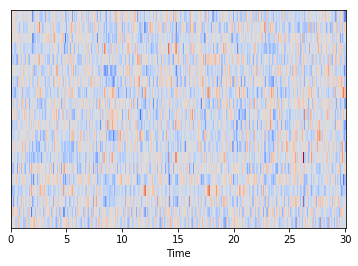

In [22]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

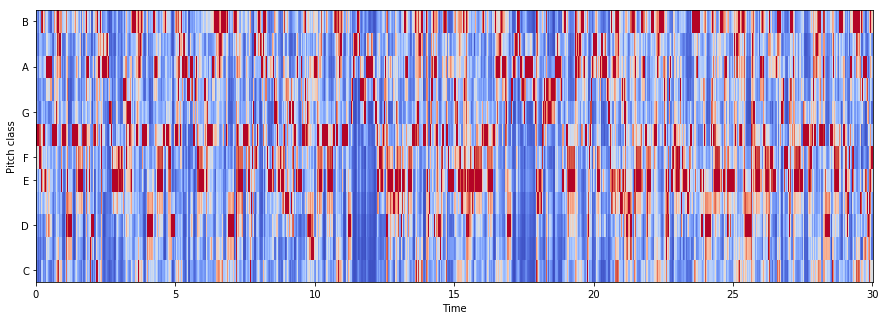

In [23]:

hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')